In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [87]:
arr = np.load('perfmat1460578364.npy')

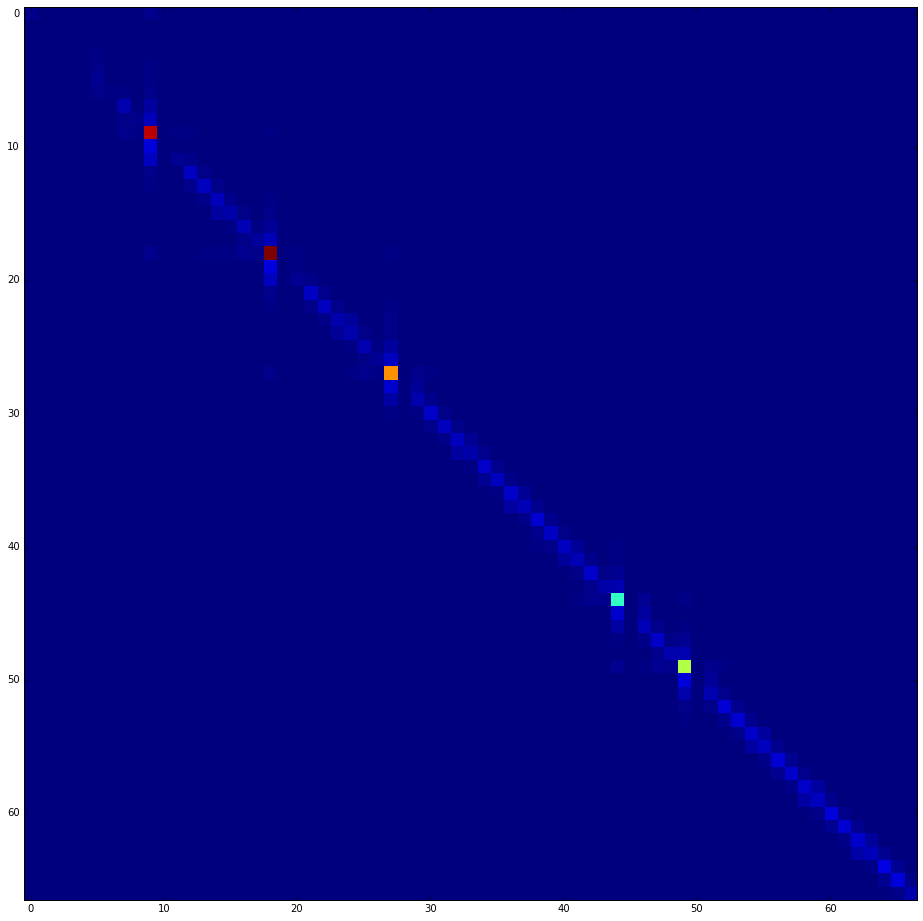

In [88]:
fig = plt.figure(figsize=(16,16))
plt.imshow(arr, cmap=plt.get_cmap('jet'), interpolation='nearest')
fig.savefig('planecode_mat_1460578364.pdf')

Let's just and be sure which axis is the vertical...

In [89]:
arr2 = np.random.randn(48).reshape(12, 4)

In [90]:
print arr2

[[ 1.59361071  0.90806367  1.59338432  1.35853591]
 [ 0.99124244 -0.03520919  0.06944474 -0.96918073]
 [-0.59925227 -1.15751502 -0.59743979 -0.56062913]
 [ 0.07725589 -0.17103665 -0.70007316 -0.86382157]
 [ 0.77524742 -0.16458543 -0.36416588 -0.53130206]
 [ 1.35866459  0.76776785 -0.40870351  0.25279328]
 [ 0.94972959 -0.38978247  0.78000955  0.53319044]
 [ 1.62623205  2.00137757  1.51931167  1.77018408]
 [-0.50727542 -0.92079842 -0.11251014 -0.81472878]
 [ 1.07141759 -1.31686588 -0.04368599  2.44759213]
 [-0.27214739  0.11665043  0.65530536 -1.17001696]
 [-0.10593792  0.26371446 -1.60540514  0.73356985]]


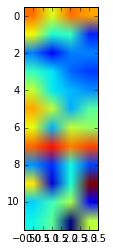

In [91]:
plt.imshow(arr2)

We row normalize (divide by `axis=1` to get the _purity_ - it is saying "okay, I reconstructed an event in target 1, did it really come from target 1?, etc."

In [92]:
arr3 = np.arange(16, dtype=np.float32).reshape(4, 4)
print arr3

[[  0.   1.   2.   3.]
 [  4.   5.   6.   7.]
 [  8.   9.  10.  11.]
 [ 12.  13.  14.  15.]]


In [93]:
print arr3.sum(axis=1)

[  6.  22.  38.  54.]


In [94]:
arr4 = np.zeros_like(arr3)
for i in range(4):
    arr4[i, :] = arr3[i, :] / arr3.sum(axis=1)[i]
print arr4

[[ 0.          0.16666667  0.33333334  0.5       ]
 [ 0.18181819  0.22727273  0.27272728  0.31818181]
 [ 0.21052632  0.23684211  0.2631579   0.28947368]
 [ 0.22222222  0.24074075  0.25925925  0.27777779]]


In [95]:
pur = np.zeros_like(arr)
for i in range(np.shape(arr)[0]):
    pur[i, :] = arr[i, :] / arr.sum(axis=1)[i]

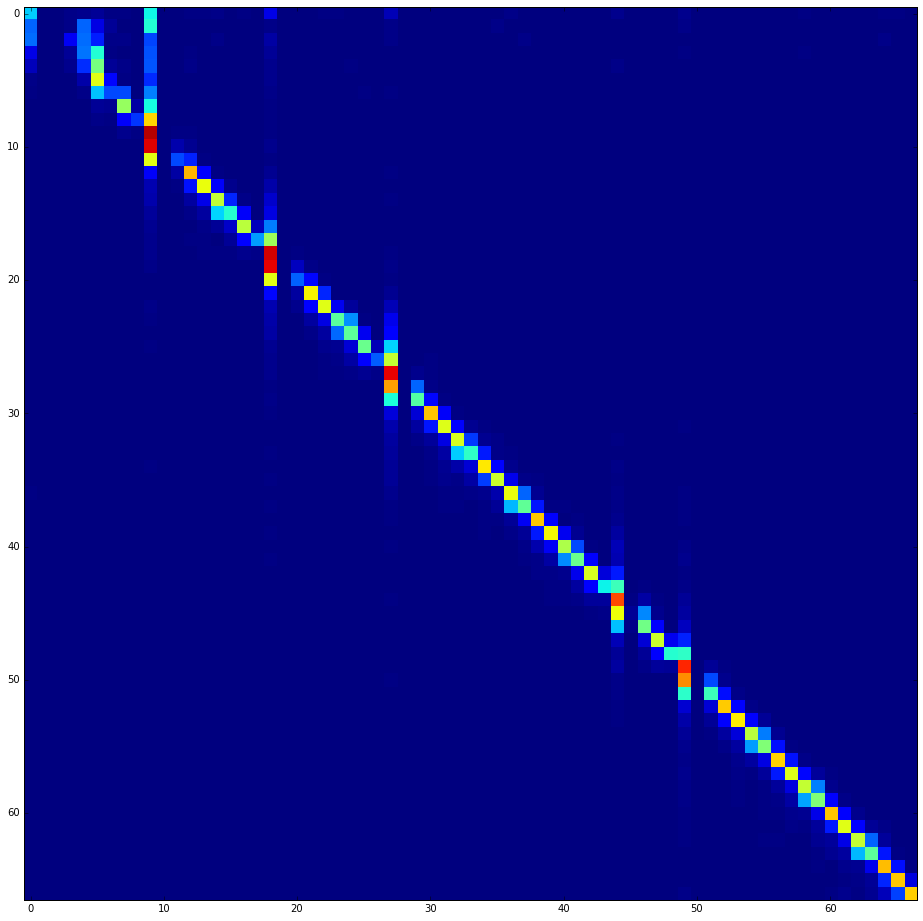

In [96]:
fig = plt.figure(figsize=(16,16))
plt.imshow(pur, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)
fig.savefig('planecode_mat_1460578364_pur.pdf')

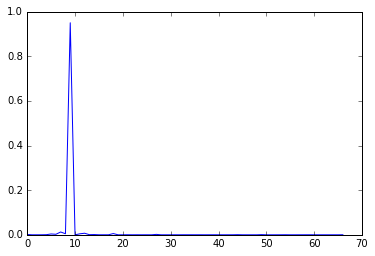

In [97]:
pur9 = pur[9, :]
plt.plot(np.arange(len(pur9)), pur9)

In [98]:
pur9[:12]

array([  1.46377168e-03,   0.00000000e+00,   0.00000000e+00,
         8.13206498e-05,   4.87923884e-04,   3.74074979e-03,
         2.27697822e-03,   1.26047004e-02,   4.71659750e-03,
         9.49987829e-01,   0.00000000e+00,   4.39131493e-03], dtype=float32)

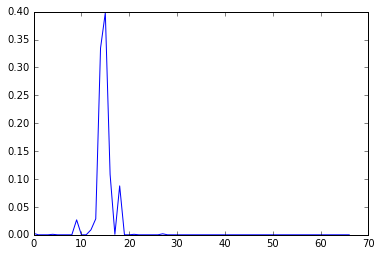

In [99]:
pur15 = pur[15, :]
plt.plot(np.arange(len(pur15)), pur15)

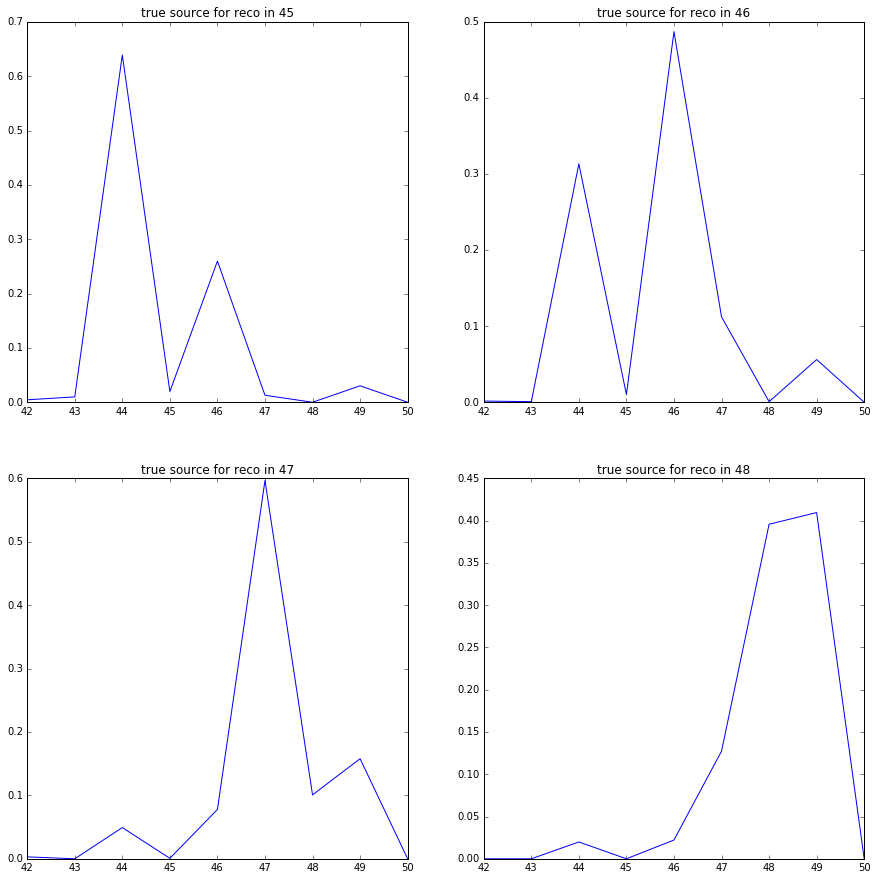

In [100]:
pur45 = pur[45, :]
pur46 = pur[46, :]
pur47 = pur[47, :]
pur48 = pur[48, :]

fig = plt.figure(figsize=(15, 15))
gs = plt.GridSpec(2, 2)
ax = plt.subplot(gs[0])
ax.plot(np.arange(42,51), pur45[42:51])
ax.set_title('true source for reco in 45')
ax = plt.subplot(gs[1])
ax.plot(np.arange(42,51), pur46[42:51])
ax.set_title('true source for reco in 46')
ax = plt.subplot(gs[2])
ax.plot(np.arange(42,51), pur47[42:51])
ax.set_title('true source for reco in 47')
ax = plt.subplot(gs[3])
ax.plot(np.arange(42,51), pur48[42:51])
ax.set_title('true source for reco in 48')
fig.savefig('region9_1460578364_pur.pdf')

In [107]:
eff = np.zeros_like(arr)
for i in range(np.shape(arr)[0]):
    eff[:, i] = arr[:, i] / arr.sum(axis=0)[i]

/Users/perdue/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


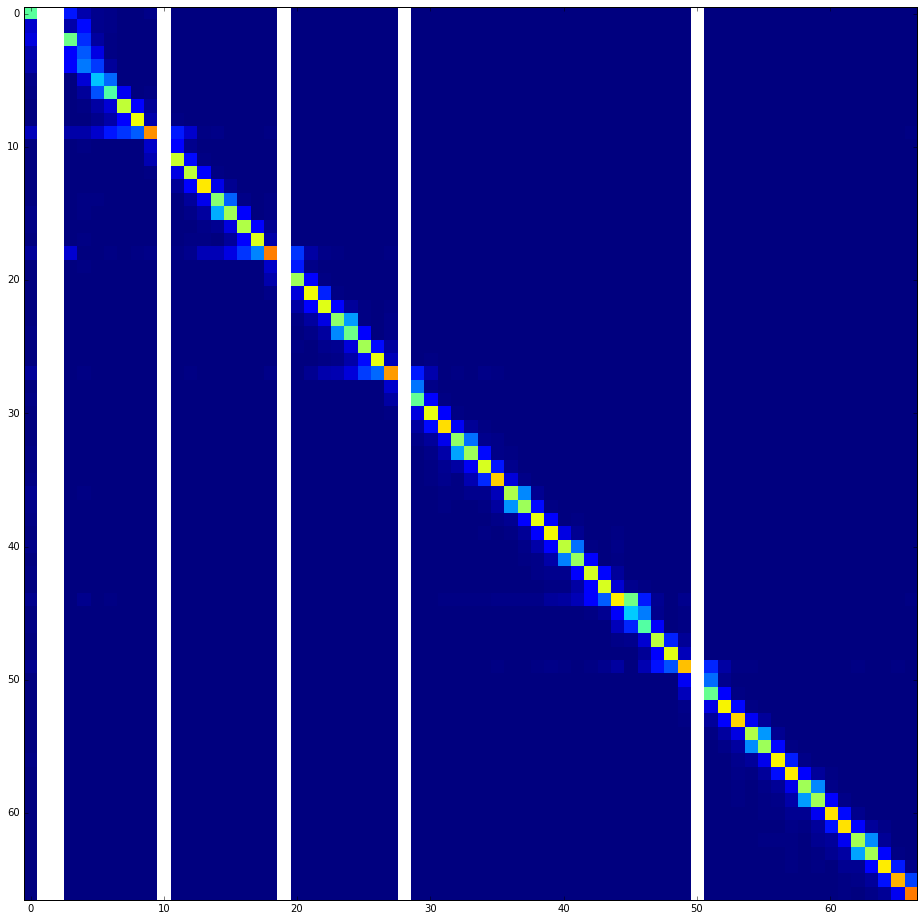

In [108]:
fig = plt.figure(figsize=(16,16))
plt.imshow(eff, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)
fig.savefig('planecode_mat_1460578364_eff.pdf')

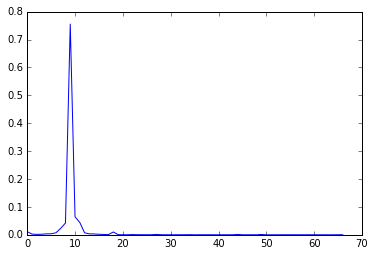

In [109]:
eff9 = eff[:, 9]
plt.plot(np.arange(len(eff9)), eff9)

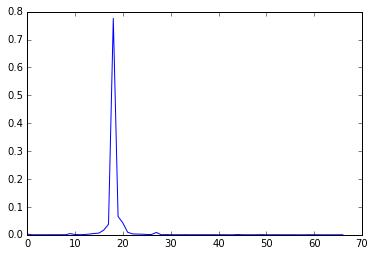

In [113]:
eff18 = eff[:, 18]
plt.plot(np.arange(len(eff18)), eff18)

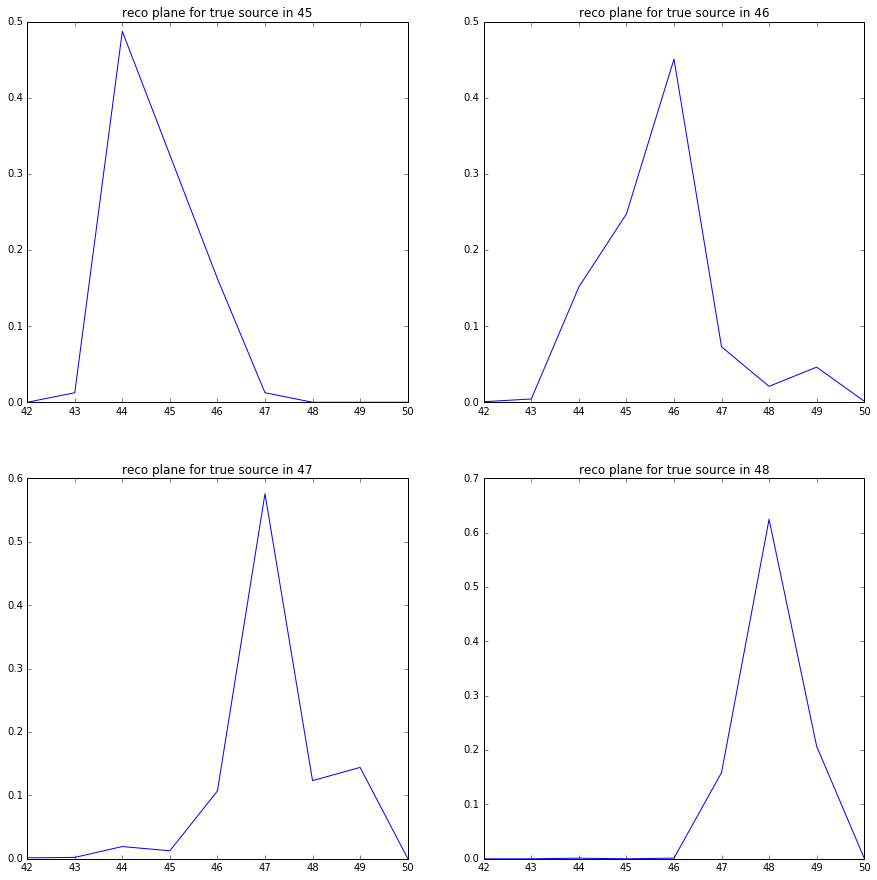

In [114]:
eff45 = eff[:, 45]
eff46 = eff[:, 46]
eff47 = eff[:, 47]
eff48 = eff[:, 48]

fig = plt.figure(figsize=(15, 15))
gs = plt.GridSpec(2, 2)
ax = plt.subplot(gs[0])
ax.plot(np.arange(42,51), eff45[42:51])
ax.set_title('reco plane for true source in 45')
ax = plt.subplot(gs[1])
ax.plot(np.arange(42,51), eff46[42:51])
ax.set_title('reco plane for true source in 46')
ax = plt.subplot(gs[2])
ax.plot(np.arange(42,51), eff47[42:51])
ax.set_title('reco plane for true source in 47')
ax = plt.subplot(gs[3])
ax.plot(np.arange(42,51), eff48[42:51])
ax.set_title('reco plane for true source in 48')
fig.savefig('region9_1460578364_eff.pdf')

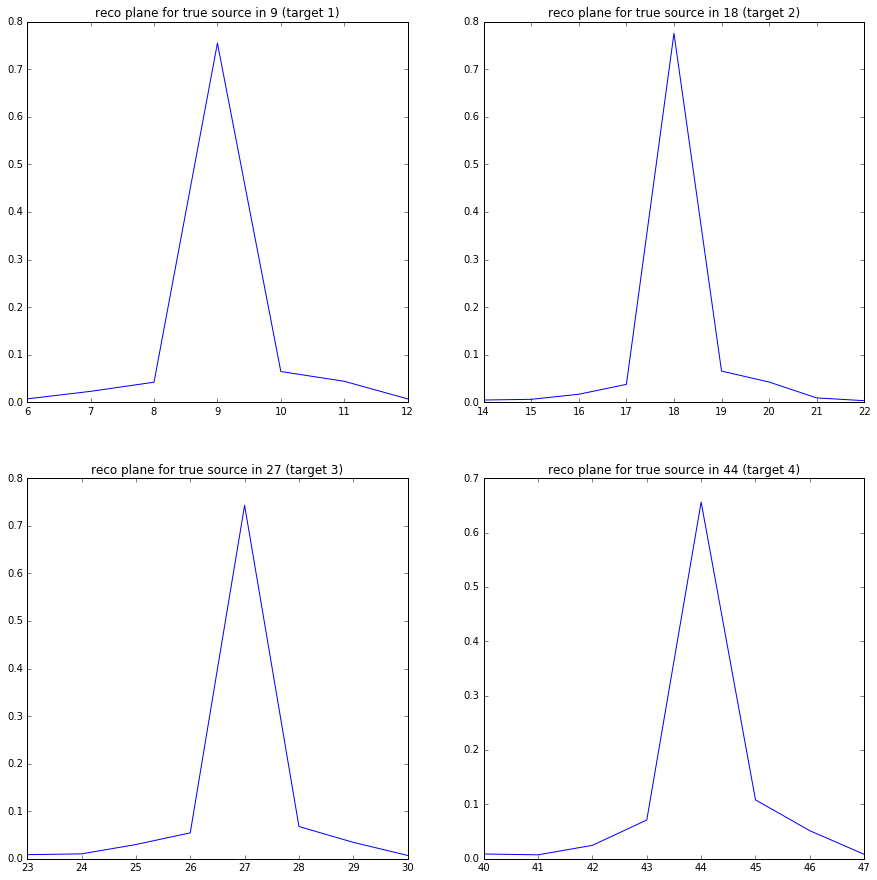

In [115]:
eff9 = eff[:, 9]
eff18 = eff[:, 18]
eff27 = eff[:, 27]
eff44 = eff[:, 44]

fig = plt.figure(figsize=(15, 15))
gs = plt.GridSpec(2, 2)
ax = plt.subplot(gs[0])
ax.plot(np.arange(6,13), eff9[6:13])
ax.set_title('reco plane for true source in 9 (target 1)')
ax = plt.subplot(gs[1])
ax.plot(np.arange(14,23), eff18[14:23])
ax.set_title('reco plane for true source in 18 (target 2)')
ax = plt.subplot(gs[2])
ax.plot(np.arange(23,31), eff27[23:31])
ax.set_title('reco plane for true source in 27 (target 3)')
ax = plt.subplot(gs[3])
ax.plot(np.arange(40,48), eff44[40:48])
ax.set_title('reco plane for true source in 44 (target 4)')
fig.savefig('targs1-4_1460578364_eff.pdf')

In [117]:
arr[:, 45].sum()

80.0

In [118]:
arr.sum()

119101.0

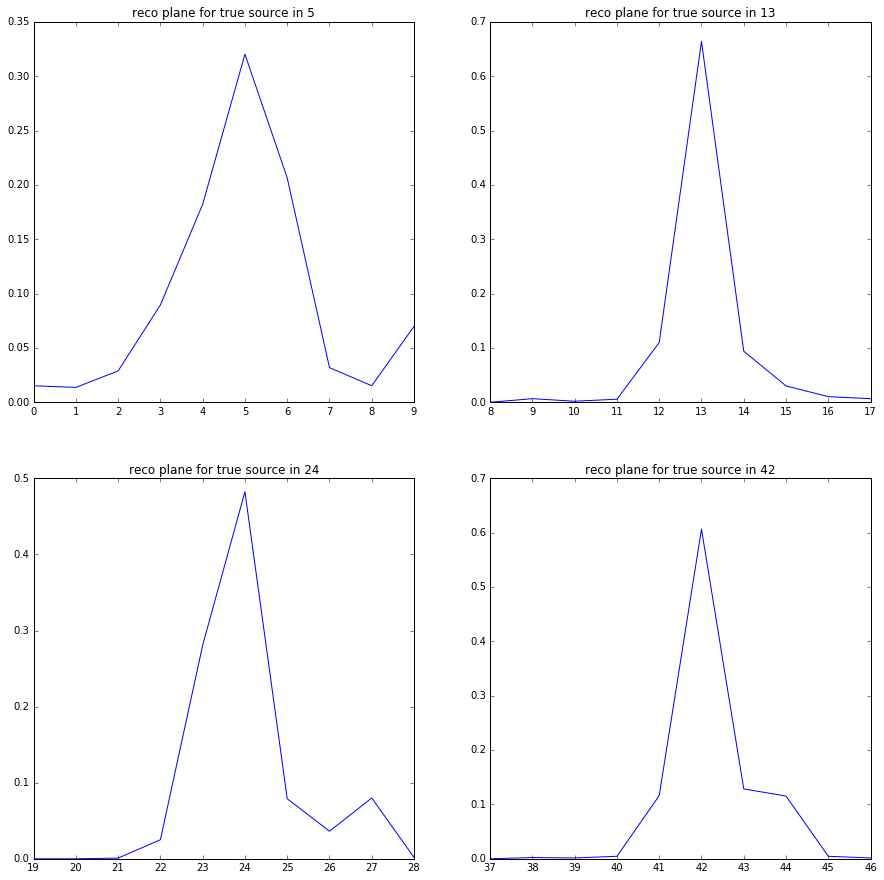

In [121]:
idx = [5, 13, 24, 42]
fig = plt.figure(figsize=(15, 15))
gs = plt.GridSpec(2, 2)
for i, col in enumerate(idx):
    ax = plt.subplot(gs[i])
    ax.plot(np.arange(col-5,col+5), eff[(col-5):(col+5), col])
    ax.set_title('reco plane for true source in %d' % col)
fig.savefig('plns5-13-24-42_1460578364_eff.pdf')